Classification of Handwritten digits images that represent single digit

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

MNIST

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(X_train, y_train),(X_test,y_test) = mnist.load_data('D:/git/DeepLearning/CNN/dataset/mnist.npz')

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

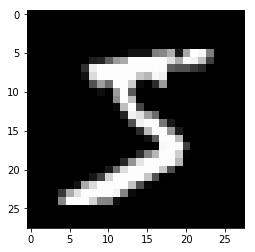

In [8]:
plt.imshow(X_train[0],cmap='gray')

In [9]:
#reshape to get 2d object array
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [10]:
X_train.shape

(60000, 784)

In [11]:
#converting values 0 to 255 to b/e 0 to 1 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [12]:
X_train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [13]:
from keras.utils.np_utils import to_categorical

In [14]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [15]:
y_train[0]

5

In [16]:
# value 1 for the digit 5. others are 0
y_train_cat[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [17]:
#10 categories from digit 0-9
y_train_cat.shape

(60000, 10)

In [18]:
y_test_cat.shape

(10000, 10)

Fully connected model to classify images

In [19]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(512,input_dim =28*28,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [20]:
h = model.fit(X_train,y_train_cat,batch_size=128,epochs=10,verbose=1,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 21s 493us/step - loss: 0.3467 - acc: 0.8930 - val_loss: 0.4279 - val_acc: 0.8846
Epoch 2/10
42000/42000 [==============================] - 12s 276us/step - loss: 0.1138 - acc: 0.9655 - val_loss: 0.2195 - val_acc: 0.9288
Epoch 3/10
42000/42000 [==============================] - 11s 260us/step - loss: 0.0715 - acc: 0.9780 - val_loss: 0.1325 - val_acc: 0.9635
Epoch 4/10
42000/42000 [==============================] - 10s 247us/step - loss: 0.0531 - acc: 0.9838 - val_loss: 0.1090 - val_acc: 0.9704
Epoch 5/10
42000/42000 [==============================] - 14s 330us/step - loss: 0.0407 - acc: 0.9878 - val_loss: 0.1128 - val_acc: 0.9720
Epoch 6/10
42000/42000 [==============================] - 14s 344us/step - loss: 0.0298 - acc: 0.9906 - val_loss: 0.1936 - val_acc: 0.9597
Epoch 7/10
42000/42000 [==============================] - 14s 342us/step - loss: 0.0258 - acc: 0.9918 - val_loss: 0.

Text(0.5,0,'Epochs')

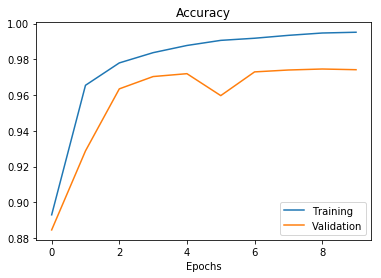

In [21]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')
#overfitting since train accuracy > validation accuracy

In [22]:
test_accuracy = model.evaluate(X_test,y_test_cat)[1]
test_accuracy

10000/10000 [==============================] - 3s 315us/step


0.97470000000000001

Tensor Math

In [23]:
#random integers from 0 to 9
#1st axis ,outermost : 2 objects
#2nd axis : 3 objects
#3rd axis : 4 objects
#4th axis, innermost : 5 objects

A = np.random.randint(10,size=(2, 3, 4, 5))
B = np.random.randint(10,size=(2, 3))

In [24]:
A

array([[[[6, 3, 9, 6, 6],
         [9, 5, 8, 9, 6],
         [9, 9, 4, 3, 9],
         [6, 4, 8, 2, 3]],

        [[3, 4, 8, 7, 3],
         [6, 2, 8, 9, 6],
         [0, 5, 6, 4, 8],
         [1, 3, 0, 8, 8]],

        [[8, 6, 7, 4, 1],
         [9, 7, 5, 0, 9],
         [9, 9, 9, 8, 7],
         [6, 1, 7, 9, 6]]],


       [[[8, 4, 5, 9, 0],
         [1, 3, 1, 0, 4],
         [4, 6, 8, 6, 0],
         [6, 4, 6, 4, 8]],

        [[8, 4, 9, 1, 2],
         [9, 0, 3, 2, 7],
         [9, 2, 7, 7, 8],
         [6, 2, 3, 3, 7]],

        [[4, 7, 7, 3, 3],
         [4, 8, 1, 3, 7],
         [8, 3, 3, 3, 8],
         [4, 0, 0, 2, 4]]]])

In [25]:
A[0,1,0,3]

7

In [26]:
A[0,0,0,0]

6

In [27]:
A[1,1,1,1]

0

In [28]:
B

array([[3, 7, 5],
       [3, 0, 8]])

Random Colored Image

coloredimg as order 3 tensor wih r,g,b values

In [29]:
img = np.random.randint(255, size=(4, 4, 3), dtype='uint8')
img

array([[[ 16,  88, 145],
        [118,  69,  17],
        [ 57,  69,  42],
        [185, 182,  47]],

       [[200, 247, 215],
        [238, 178,  36],
        [194,  21, 214],
        [151, 197, 220]],

       [[159, 233,  18],
        [ 98, 149, 153],
        [ 32,  58,   5],
        [221,  65, 164]],

       [[152, 126,  71],
        [160,  42, 111],
        [ 21, 111, 245],
        [124, 194,  13]]], dtype=uint8)

Text(0.5,1,'Blue channel')

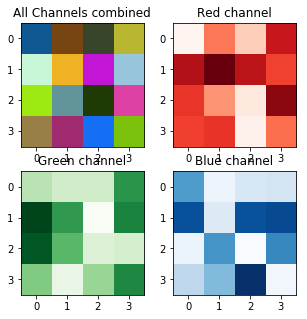

In [30]:
plt.figure(figsize=(5, 5))
plt.subplot(221)
plt.imshow(img)
plt.title("All Channels combined")

plt.subplot(222)
plt.imshow(img[:, : , 0], cmap='Reds')
plt.title("Red channel")

plt.subplot(223)
plt.imshow(img[:, : , 1], cmap='Greens')
plt.title("Green channel")

plt.subplot(224)
plt.imshow(img[:, : , 2], cmap='Blues')
plt.title("Blue channel")

Tensor operations

In [31]:
2*A

array([[[[12,  6, 18, 12, 12],
         [18, 10, 16, 18, 12],
         [18, 18,  8,  6, 18],
         [12,  8, 16,  4,  6]],

        [[ 6,  8, 16, 14,  6],
         [12,  4, 16, 18, 12],
         [ 0, 10, 12,  8, 16],
         [ 2,  6,  0, 16, 16]],

        [[16, 12, 14,  8,  2],
         [18, 14, 10,  0, 18],
         [18, 18, 18, 16, 14],
         [12,  2, 14, 18, 12]]],


       [[[16,  8, 10, 18,  0],
         [ 2,  6,  2,  0,  8],
         [ 8, 12, 16, 12,  0],
         [12,  8, 12,  8, 16]],

        [[16,  8, 18,  2,  4],
         [18,  0,  6,  4, 14],
         [18,  4, 14, 14, 16],
         [12,  4,  6,  6, 14]],

        [[ 8, 14, 14,  6,  6],
         [ 8, 16,  2,  6, 14],
         [16,  6,  6,  6, 16],
         [ 8,  0,  0,  4,  8]]]])

In [32]:
A+A

array([[[[12,  6, 18, 12, 12],
         [18, 10, 16, 18, 12],
         [18, 18,  8,  6, 18],
         [12,  8, 16,  4,  6]],

        [[ 6,  8, 16, 14,  6],
         [12,  4, 16, 18, 12],
         [ 0, 10, 12,  8, 16],
         [ 2,  6,  0, 16, 16]],

        [[16, 12, 14,  8,  2],
         [18, 14, 10,  0, 18],
         [18, 18, 18, 16, 14],
         [12,  2, 14, 18, 12]]],


       [[[16,  8, 10, 18,  0],
         [ 2,  6,  2,  0,  8],
         [ 8, 12, 16, 12,  0],
         [12,  8, 12,  8, 16]],

        [[16,  8, 18,  2,  4],
         [18,  0,  6,  4, 14],
         [18,  4, 14, 14, 16],
         [12,  4,  6,  6, 14]],

        [[ 8, 14, 14,  6,  6],
         [ 8, 16,  2,  6, 14],
         [16,  6,  6,  6, 16],
         [ 8,  0,  0,  4,  8]]]])

In [33]:
A.shape

(2, 3, 4, 5)

In [34]:
B.shape

(2, 3)

In [35]:
np.tensordot(A, B, axes=([0, 1], [0, 1]))

array([[135, 135, 189, 138,  68],
       [149, 137, 116, 114, 173],
       [148, 149, 147, 119, 182],
       [105,  50,  77, 135, 151]])

In [36]:
np.tensordot(A, B, axes=([0, 1], [0, 1])).shape

(4, 5)

In [37]:
np.tensordot(A, B, axes=([0], [0]))

array([[[[ 42,  42,  94],
         [ 21,  21,  47],
         [ 42,  63,  85],
         [ 45,  42, 102],
         [ 18,  42,  30]],

        [[ 30,  63,  53],
         [ 24,  35,  49],
         [ 27,  56,  48],
         [ 27,  63,  45],
         [ 30,  42,  62]],

        [[ 39,  63,  77],
         [ 45,  63,  93],
         [ 36,  28,  84],
         [ 27,  21,  63],
         [ 27,  63,  45]],

        [[ 36,  42,  78],
         [ 24,  28,  52],
         [ 42,  56,  88],
         [ 18,  14,  42],
         [ 33,  21,  79]]],


       [[[ 33,  21,  79],
         [ 24,  28,  52],
         [ 51,  56, 112],
         [ 24,  49,  43],
         [ 15,  21,  31]],

        [[ 45,  42, 102],
         [  6,  14,  10],
         [ 33,  56,  64],
         [ 33,  63,  61],
         [ 39,  42,  86]],

        [[ 27,   0,  72],
         [ 21,  35,  41],
         [ 39,  42,  86],
         [ 33,  28,  76],
         [ 48,  56, 104]],

        [[ 21,   7,  53],
         [ 15,  21,  31],
         [  9,   0,  2

In [38]:
np.tensordot(A, B, axes=([0], [0])).shape

(3, 4, 5, 3)

1D convolution

![title](img/discrete convolution.jpg)

In [39]:
a = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype='float32')

In [40]:
b = np.array([-1, 1], dtype='float32')

In [41]:
c = np.convolve(a, b)

In [42]:
a

array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.], dtype=float32)

In [43]:
a.shape

(15,)

In [44]:
b

array([-1.,  1.], dtype=float32)

In [45]:
b.shape

(2,)

In [46]:
c

array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.], dtype=float32)

In [47]:
c.shape

(16,)

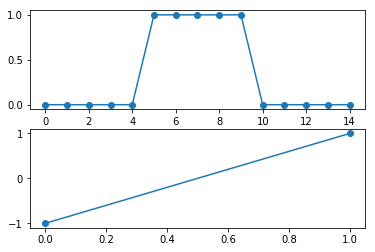

In [48]:
plt.subplot(211)
plt.plot(a, 'o-')

plt.subplot(212)
plt.plot(b, 'o-')

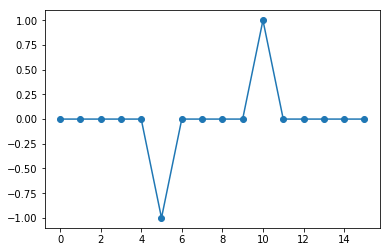

In [49]:
plt.plot(c, 'o-')

2D convolution

0.55 is the degree of matching with convolution filter
![title](img/2d convolution.jpg)

Image filters with convolutions

In [50]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [51]:
img = misc.ascent()

In [52]:
img.shape

(512, 512)

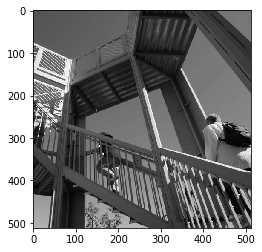

In [53]:
plt.imshow(img, cmap='gray')

In [54]:
#here we input kernel, but in cnn, these weights ll be found by network.
h_kernel = np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])

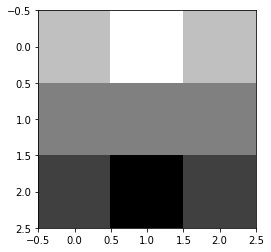

In [55]:
plt.imshow(h_kernel, cmap='gray')

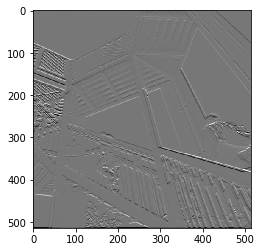

In [56]:
res = convolve2d(img, h_kernel)

plt.imshow(res, cmap='gray')
#some horizontal parts of img is highlighted, vertical is suppressed

Convolutional neural networks

input: 4 order tensor 
(N,H,W,C)
- N- no.of img
- H- height
- W- width
- C- no.of color channels

conv: 4 order tensor 
(Hf, Wf, Ci,Co)
- Hf- height of filter patch
- Wf- width of filter patch
- Ci- no.of color channels in input
- Co- no.of color channels in output filters

![title](img/convolution layer.jpg)

Convolution strides
![title](img/conv strides.jpg)

Convolution padding : preserves the img size
![title](img/conv padding.jpg)



In [57]:
from keras.layers import Conv2D

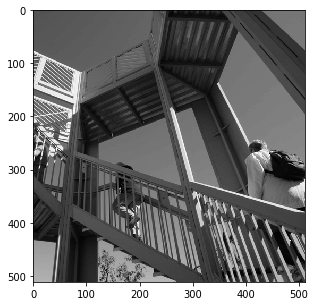

In [58]:
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')

In [59]:
img

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ..., 
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

In [60]:
img.shape

(512, 512)

In [61]:
#reshaping to 4 order tensor
img_tensor = img.reshape((1, 512, 512, 1))

In [62]:
img_tensor

array([[[[ 83],
         [ 83],
         [ 83],
         ..., 
         [117],
         [117],
         [117]],

        [[ 82],
         [ 82],
         [ 83],
         ..., 
         [117],
         [117],
         [117]],

        [[ 80],
         [ 81],
         [ 83],
         ..., 
         [117],
         [117],
         [117]],

        ..., 
        [[178],
         [178],
         [178],
         ..., 
         [ 57],
         [ 59],
         [ 57]],

        [[178],
         [178],
         [178],
         ..., 
         [ 56],
         [ 57],
         [ 57]],

        [[178],
         [178],
         [178],
         ..., 
         [ 57],
         [ 57],
         [ 58]]]])

In [71]:
# 1 convolutional layer, (3,3) kernel
model = Sequential()
model.add(Conv2D(1, (3, 3), strides=(2,1), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [64]:
img_pred_tensor = model.predict(img_tensor)

In [65]:
img_pred_tensor.shape

(1, 255, 510, 1)

In [66]:
img_pred = img_pred_tensor[0, :, :, 0]

In [74]:
img_pred.shape

(255, 510)

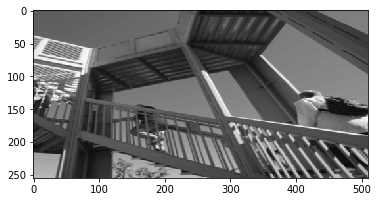

In [67]:
plt.imshow(img_pred, cmap='gray')

In [68]:
weights = model.get_weights()

In [69]:
weights[0].shape

(3, 3, 1, 1)

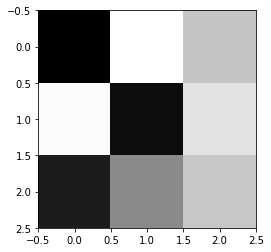

In [75]:
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

In [76]:
#new filter with all ones
weights[0] = np.ones(weights[0].shape)

In [77]:
model.set_weights(weights)

In [79]:
img_pred_tensor = model.predict(img_tensor)

In [80]:
img_pred = img_pred_tensor[0,:,:,0]

In [87]:
img_pred.shape

(255, 510)

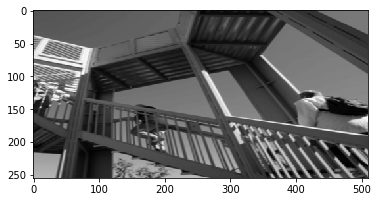

In [81]:
plt.imshow(img_pred,cmap='gray')

In [83]:
# img ll be padded with 0, so we wont loose the px on border
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')

img_pred_tensor = model.predict(img_tensor)

img_pred_tensor.shape

(1, 512, 512, 1)

In [88]:
img_pred = img_pred_tensor[0,:,:,0]
img_pred.shape

(512, 512)

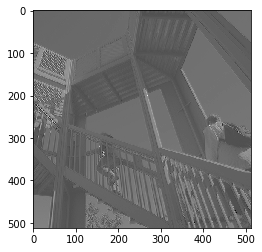

In [89]:
plt.imshow(img_pred,cmap='gray')

Pooling layers

max pool:
maximum value is alone kept no overlapping so that img size is reduced, preserving info about good matches
![title](img/max pool.jpg)

In [91]:
from keras.layers import MaxPool2D, AvgPool2D

In [92]:
model = Sequential()
model.add(MaxPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [93]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

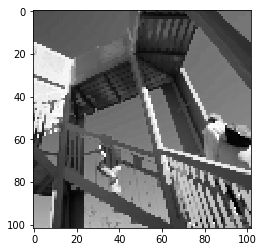

In [94]:
plt.imshow(img_pred, cmap='gray')

In [95]:
model = Sequential()
model.add(AvgPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

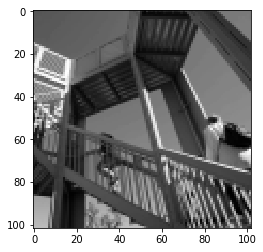

In [96]:
img_pred = model.predict(img_tensor)[0, :, :, 0]
plt.imshow(img_pred, cmap='gray')

Final architecture

In [97]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [98]:
X_train.shape

(60000, 28, 28, 1)

In [99]:
from keras.layers import Flatten, Activation

In [100]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [101]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
